<h1>template notebook</h1>

import libraries

In [1]:
#defaul libraries
#https://docs.python.org/ja/
import os
import sys
import io

import math
import random
import pprint
import time
import datetime
import typing
import json
import glob
import requests
import warnings
import gc
from pprint import pprint
import re

import numpy as np #https://numpy.org/
import pandas as pd #https://pandas.pydata.org/
import sklearn #https://scikit-learn.org/stable/

import matplotlib.pyplot as plt #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
%matplotlib inline

import seaborn as sns
sns.set()

from tqdm import tqdm #https://tqdm.github.io/

import torch #https://pytorch.org/
import transformers #https://huggingface.co/transformers/

import torchvision
import torchtext

CFG

In [2]:
class CFG():
    
    data_path="/kaggle/input/cifar-10/"
    debug=True
    seed=0

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    batch_size=1#32
    epochs=30
    learning_rate=0.1
    kFold=5

    #高速化関連
    #https://qiita.com/sugulu_Ogawa_ISID/items/62f5f7adee083d96a587

    #GPU 遅くなるらしい↓
    torch.backends.cudnn.deterministic = True

    #イテレーションごとのnnの順伝搬および誤差関数の 計算手法がある程度一定であれば、torch.backends.cudnn.benchmark = Trueで GPU での計算が高速化
    torch.backends.cudnn.benchmark = False


def set_seed(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    #tf.random.set_seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(CFG.seed)

print(CFG.device)
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.get_device_name())

cpu


color

In [3]:
def color(string,fg='DEFAULT',bg='DEFAULT',fg_rgb=None,bg_rgb=None,style='END'):
    colors=['BLACK','RED','GREEN','YELLOW','BLUE','PURPLE','CYAN','WHITE','8','DEFAULT']
    styles=['END','BOLD','2','3','UNDERLINE','5','6','REVERSE','INVISIBLE','9']

    fg=f'\033[3{colors.index(fg)}m'
    bg=f'\033[4{colors.index(bg)}m'
    style=f'\033[0{styles.index(style)}m'

    if fg_rgb:fg=f"\033[38;2;{fg_rgb[0]};{fg_rgb[1]};{fg_rgb[2]}m"
    if bg_rgb:bg=f"\033[48;2;{bg_rgb[0]};{bg_rgb[1]};{bg_rgb[2]}m"

    return style+fg+bg+str(string)+'\033[0m'

In [4]:
#pip install py7zr

In [5]:
# import py7zr
# archive = py7zr.SevenZipFile(CFG.data_path+'train.7z', mode='r')
# archive.extractall(path='train')
# archive = py7zr.SevenZipFile(CFG.data_path+'test.7z', mode='r')
# archive.extractall(path='test')
# archive.close()

In [6]:
# %%script echo skipping
trainLabels=pd.read_csv(os.path.join(CFG.data_path,"trainLabels.csv"),index_col='id')
sampleSubmission=pd.read_csv(os.path.join(CFG.data_path,"sampleSubmission.csv"),index_col='id')

data={
    'train':torchvision.datasets.CIFAR10(".", train=True,  transform = None, download = True),
    'test':torchvision.datasets.CIFAR10(".", train=False, transform = None, download = True),
}

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [7]:
trainLabels

,label
id,
1,frog
2,truck
3,truck
4,deer
5,automobile
...,...
49996,bird
49997,frog
49998,truck


In [8]:
sampleSubmission

,label
id,
1,cat
2,cat
3,cat
4,cat
5,cat
...,...
299996,cat
299997,cat
299998,cat


In [9]:
data['train'].classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

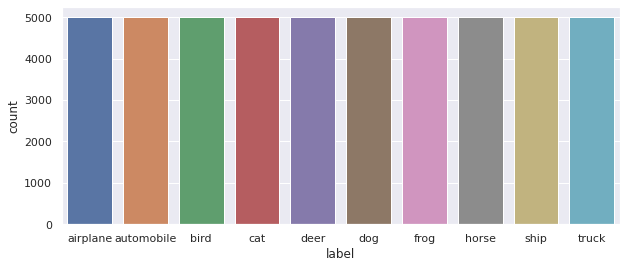

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(trainLabels.label,order=data['train'].classes)

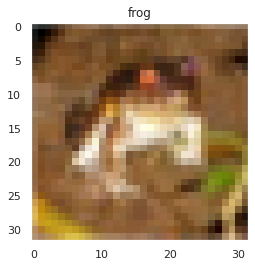

In [11]:
plt.imshow(np.asarray(data['train'][0][0]))
plt.grid(False)
plt.title(data['train'].classes[data['train'][0][1]])
plt.show()

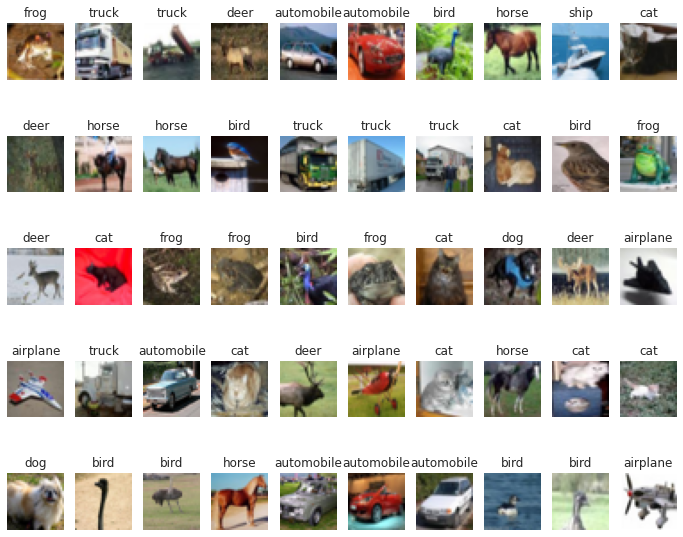

In [12]:
plt.figure(figsize=(12,10))
x, y = 10, 5 # 10列5行
for i in range(50):  
    plt.subplot(y, x, i+1)
    image,label=data['train'][i]
    plt.imshow(np.asarray(image))
    plt.grid(False)
    plt.axis('off')
    plt.title(data['train'].classes[label])
plt.show()

submission

# sample_submission

In [13]:
submission=pd.DataFrame(index=sampleSubmission.index,columns=['label'])
submission

,label
id,
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
299996,NaN
299997,NaN
299998,NaN


In [14]:
submission.label=['cat']*len(submission)
submission
#0.????
submission.to_csv("submission.csv",index=submission.index.name)